## Final Project Submission

Please fill out:
* Student name: Idah Atieno Otieno
* Student pace: Part Time
* Scheduled project review date/time: 3rd August
* Instructor name: Noah Kandie
* Blog post URL:


## **Business Understanding**
This project aims at analyzing movie data sets in order to help Microsoft decide on which types of movies to focus on in their upcoming movie studio.

The decision will be based on how well the different types on movies are doing.



## **Familiarizing with the data sets**


In [400]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
# Reading the movie gross data set
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
movie_gross.tail(20)

,title,studio,domestic_gross,foreign_gross,year
3367,Elliot: The Littlest Reindeer,Scre.,24300.0,NaN,2018
3368,The Workshop,Strand,22100.0,NaN,2018
3369,Loving Pablo,Uni.,22000.0,NaN,2018
3370,A Paris Education,KL,21600.0,NaN,2018
3371,Tag Along: The Devil Fish,CL,20700.0,NaN,2018
3372,Gabriel and the Mountain,Strand,18400.0,NaN,2018
3373,Marlina the Murderer in Four Acts,Icar.,17800.0,NaN,2018
3374,The Escape,IFC,14000.0,NaN,2018
3375,How Victor 'The Garlic' Took Alexey 'The Stud'...,CARUSEL,13000.0,NaN,2018
3376,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.0,NaN,2018


In [402]:
# Summary of the movie_gross data frame
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [403]:
# Checking the missing values in movie_gross
movie_gross.isna().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


In [404]:
# Dropping rows with null values in domestic_gross and studio as they are few
movie_gross = movie_gross.dropna(subset=['domestic_gross','studio'])
movie_gross.isna().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,1349
year,0


In [405]:
# Filling in null values in the foreign_gross column with zero assuming not all movies get to sell beyond the domestic market
movie_gross['foreign_gross'].fillna(0, inplace=True)
movie_gross.isna().sum()

/tmp/ipython-input-775373848.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_gross['foreign_gross'].fillna(0, inplace=True)


,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0


In [406]:
# Understanding the structure of Title Ratings
ratings = pd.read_csv('imdb.title.ratings.csv.gz')
ratings.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [407]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There seems to be no null values as every column has an equal number of values to the number of rows.

In [408]:
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [409]:
# Understanding the structure of title basics data set
basics = pd.read_csv('imdb.title.basics.csv.gz')
basics.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


Observations made concerning the data set:
* Basics and ratings data sets seem to have one column in common, 'tconst'
* There are movies that have multiple genres

In [410]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [411]:
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [412]:
# Cleaning basics to split up the individual genres
individual_genres = basics['genres'].str.split(',', expand=True)
basics = pd.concat([basics, individual_genres], axis=1)
basics.rename(columns={0 : 'genre_1', 1 : 'genre_2', 2 : 'genre_3'}, inplace=True)
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN


## **Merging the data sets**

In [413]:
# setting the indices of both ratings and basics to 'tconst' before merging
ratings = ratings.set_index('tconst')
ratings

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [414]:
basics = basics.set_index('tconst')
basics

,primary_title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None


In [415]:
# merging basics and ratings using inner join
basics_and_ratings = pd.concat([basics,ratings], join='inner', axis=1)
basics_and_ratings

,primary_title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3,averagerating,numvotes
tconst,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None,7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None,6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,6.5,119
...,...,...,...,...,...,...,...,...,...,...
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,Documentary,None,None,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",Drama,Family,None,8.7,136
tt9914642,Albatross,Albatross,2017,NaN,Documentary,Documentary,None,None,8.5,8


In [416]:
# merging basics_and_ratings with movie_gross
# Checking the number of unique values in each to understandand how to merge both
print(len(basics_and_ratings['original_title'].unique()))
print(len(movie_gross['title'].unique()))

71097
3355


There seems to be a number of duplicate titles, so I will merge based on both year and title

In [417]:
# renaming the primary_title and start_year columns in basics_and_ratings to match the title and year column in movie_gross
basics_and_ratings.rename(columns={'primary_title':'title', 'start_year':'year'}, inplace=True)
basics_and_ratings

,title,original_title,year,runtime_minutes,genres,genre_1,genre_2,genre_3,averagerating,numvotes
tconst,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama,7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None,7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None,6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,6.5,119
...,...,...,...,...,...,...,...,...,...,...
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,Documentary,None,None,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",Drama,Family,None,8.7,136
tt9914642,Albatross,Albatross,2017,NaN,Documentary,Documentary,None,None,8.5,8


In [418]:
# merging the two data sets
df = pd.merge(movie_gross, basics_and_ratings, on=['title','year'], how='inner')
df

,title,studio,domestic_gross,foreign_gross,year,original_title,runtime_minutes,genres,genre_1,genre_2,genre_3,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,103.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,8.3,682218
1,Inception,WB,292600000.0,535700000,2010,Inception,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,93.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",Adventure,Drama,Fantasy,5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,Helicopter Eela,Eros,72000.0,0,2018,Helicopter Eela,135.0,Drama,Drama,None,None,5.4,673
1833,Girls vs Gangsters,WGUSA,37100.0,0,2018,Gui mi 2,120.0,"Comedy,Drama",Comedy,Drama,None,3.3,148
1834,A Paris Education,KL,21600.0,0,2018,Mes provinciales,137.0,Drama,Drama,None,None,6.3,371
1835,The Quake,Magn.,6200.0,0,2018,Skjelvet,106.0,"Action,Drama,Thriller",Action,Drama,Thriller,6.2,5270


In [419]:
# Analyzing the combined data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1837 non-null   object 
 1   studio           1837 non-null   object 
 2   domestic_gross   1837 non-null   float64
 3   foreign_gross    1837 non-null   object 
 4   year             1837 non-null   int64  
 5   original_title   1837 non-null   object 
 6   runtime_minutes  1833 non-null   float64
 7   genres           1835 non-null   object 
 8   genre_1          1835 non-null   object 
 9   genre_2          1603 non-null   object 
 10  genre_3          1106 non-null   object 
 11  averagerating    1837 non-null   float64
 12  numvotes         1837 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 186.7+ KB


## **Cleaning the final data set before analysis**

In [420]:
# Converting the foreign_gross column to numeric values
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1837 entries, 0 to 1836
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1837 non-null   object 
 1   studio           1837 non-null   object 
 2   domestic_gross   1837 non-null   float64
 3   foreign_gross    1833 non-null   float64
 4   year             1837 non-null   int64  
 5   original_title   1837 non-null   object 
 6   runtime_minutes  1833 non-null   float64
 7   genres           1835 non-null   object 
 8   genre_1          1835 non-null   object 
 9   genre_2          1603 non-null   object 
 10  genre_3          1106 non-null   object 
 11  averagerating    1837 non-null   float64
 12  numvotes         1837 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 186.7+ KB


In [421]:
# Checking null values
df.isna().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,4
year,0
original_title,0
runtime_minutes,4
genres,2
genre_1,2
genre_2,234


In [422]:
# filling in null values in foreign_gross and runtime_minutes
df['foreign_gross'] = df[['foreign_gross']].fillna(value=0)
df['runtime_minutes'] = df[['runtime_minutes']].fillna(value=0)
df.isna().sum()

,0
title,0
studio,0
domestic_gross,0
foreign_gross,0
year,0
original_title,0
runtime_minutes,0
genres,2
genre_1,2
genre_2,234


In [423]:
# Introducing a new column, total_gross and checking all columns
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'original_title', 'runtime_minutes', 'genres', 'genre_1', 'genre_2',
       'genre_3', 'averagerating', 'numvotes', 'total_gross'],
      dtype='object')

In [424]:
# Checking the unique items per column to identify the number of different genres
all_genres = df[['genre_1','genre_2','genre_3']]
unique_genres = all_genres.stack().unique()
unique_genres

array(['Adventure', 'Animation', 'Comedy', 'Action', 'Sci-Fi', 'Drama',
       'Fantasy', 'Family', 'Biography', 'History', 'Thriller', 'Romance',
       'Horror', 'Mystery', 'Western', 'Crime', 'Sport', 'War', 'Music',
       'Musical', 'Documentary', 'News'], dtype=object)

## **Analyzing the data**

In [425]:
# sorting the genres by mean of total gross
df_genres = pd.melt(df, id_vars=['title','total_gross'], value_vars=['genre_1','genre_2','genre_3'], var_name='All Genres', value_name='Genres')
df_genres_mean = df_genres.groupby('Genres')['total_gross'].mean().sort_values(ascending=False)
df_genres_mean

,total_gross
Genres,
Sci-Fi,3.431858e+08
Animation,3.289207e+08
Adventure,3.163018e+08
Fantasy,2.003147e+08
Action,1.912132e+08
Family,1.477129e+08
Comedy,1.089184e+08
Thriller,1.065123e+08
Western,9.809765e+07


In [426]:
# Top 3 best performing genres
df_genres_mean[0:3]

,total_gross
Genres,
Sci-Fi,3.431858e+08
Animation,3.289207e+08
Adventure,3.163018e+08


The top 3 genres by mean of total gross are:
* Sci-Fi
* Animation
* Adventure

/tmp/ipython-input-1024719049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_genres_mean, palette='viridis').set(xlabel='Genres', ylabel='Mean Gross', title='Average Gross per Genre')


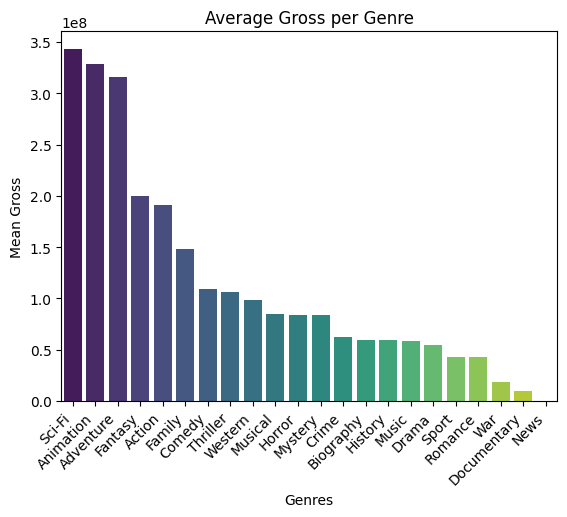

In [427]:
sns.barplot(data=df_genres_mean, palette='viridis').set(xlabel='Genres', ylabel='Mean Gross', title='Average Gross per Genre')
plt.xticks(rotation=45, ha='right')
plt.savefig('Total Gross per Genre.jpg');

In [428]:
# Being that mean tends to distort values especially when there are outliers, it is important to also check the median of the genres
df_genres_median = df_genres.groupby('Genres')['total_gross'].median().sort_values(ascending=False)
df_genres_median

,total_gross
Genres,
Animation,245700000.0
Sci-Fi,242850000.0
Adventure,200700000.0
Fantasy,78900000.0
Family,77100000.0
Action,71200000.0
Horror,43000000.0
Thriller,37750000.0
Comedy,35426000.0


In [429]:
# Checking the top 3 genres by median of total gross
df_genres_median[0:3]

,total_gross
Genres,
Animation,245700000.0
Sci-Fi,242850000.0
Adventure,200700000.0


The top 3 genres remain the same only that animation seems to have overtaken SciFi

In [430]:
# Checking the best performing studios to determine competitors to watch out for
studios_meangross = df.groupby('studio')['total_gross'].mean().sort_values(ascending=False)
studios_meangross[0:3]

,total_gross
studio,
HC,8.703000e+08
P/DW,5.076500e+08
BV,4.324910e+08


In [431]:
studios_mediangross = df.groupby('studio')['total_gross'].median().sort_values(ascending=False)
studios_mediangross[0:3]

,total_gross
studio,
HC,870300000.0
P/DW,524950000.0
BV,279750000.0


The top 3 studios by mean and median are:
* HC
* P/DW
* BV

/tmp/ipython-input-1938966916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=studios_meangross[0:20], palette='Set2').set(xlabel='Studios', ylabel='Mean Gross', title='Top 20 Studios Performance')


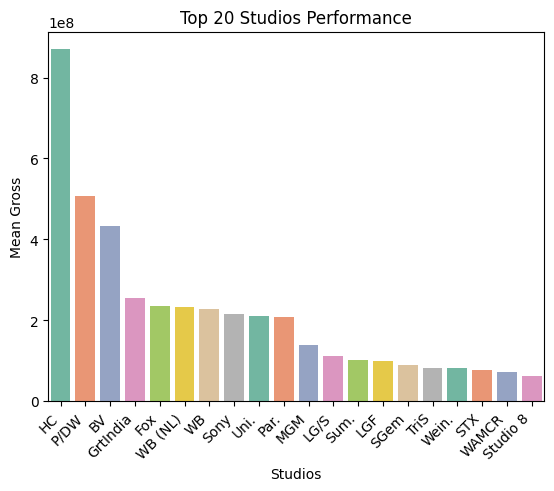

In [432]:
# Performance by top 20 studios
sns.barplot(data=studios_meangross[0:20], palette='Set2').set(xlabel='Studios', ylabel='Mean Gross', title='Top 20 Studios Performance')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top 20 Studios Performance.jpg');

In [433]:
# It is important to check the trends in performance of the different genres
df_years = pd.melt(df, id_vars=['title','year','total_gross'], value_vars=['genre_1','genre_2','genre_3'], var_name='Genres', value_name='Specific_Genre')
df_years

,title,year,total_gross,Genres,Specific_Genre
0,Toy Story 3,2010,1.067000e+09,genre_1,Adventure
1,Inception,2010,8.283000e+08,genre_1,Action
2,Shrek Forever After,2010,7.526000e+08,genre_1,Adventure
3,The Twilight Saga: Eclipse,2010,6.985000e+08,genre_1,Adventure
4,Iron Man 2,2010,6.239000e+08,genre_1,Action
...,...,...,...,...,...
5506,Helicopter Eela,2018,7.200000e+04,genre_3,None
5507,Girls vs Gangsters,2018,3.710000e+04,genre_3,None
5508,A Paris Education,2018,2.160000e+04,genre_3,None
5509,The Quake,2018,6.200000e+03,genre_3,Thriller


In [434]:
df_years_grouped= df_years.groupby(['year','Specific_Genre'])['total_gross'].mean()
df_years_grouped.reset_index()

,year,Specific_Genre,total_gross
0,2010,Action,1.531481e+08
1,2010,Adventure,2.929287e+08
2,2010,Animation,4.626000e+08
3,2010,Biography,8.324261e+07
4,2010,Comedy,9.785397e+07
...,...,...,...
179,2018,Romance,7.507280e+07
180,2018,Sci-Fi,4.456295e+08
181,2018,Sport,7.119750e+07
182,2018,Thriller,1.344926e+08


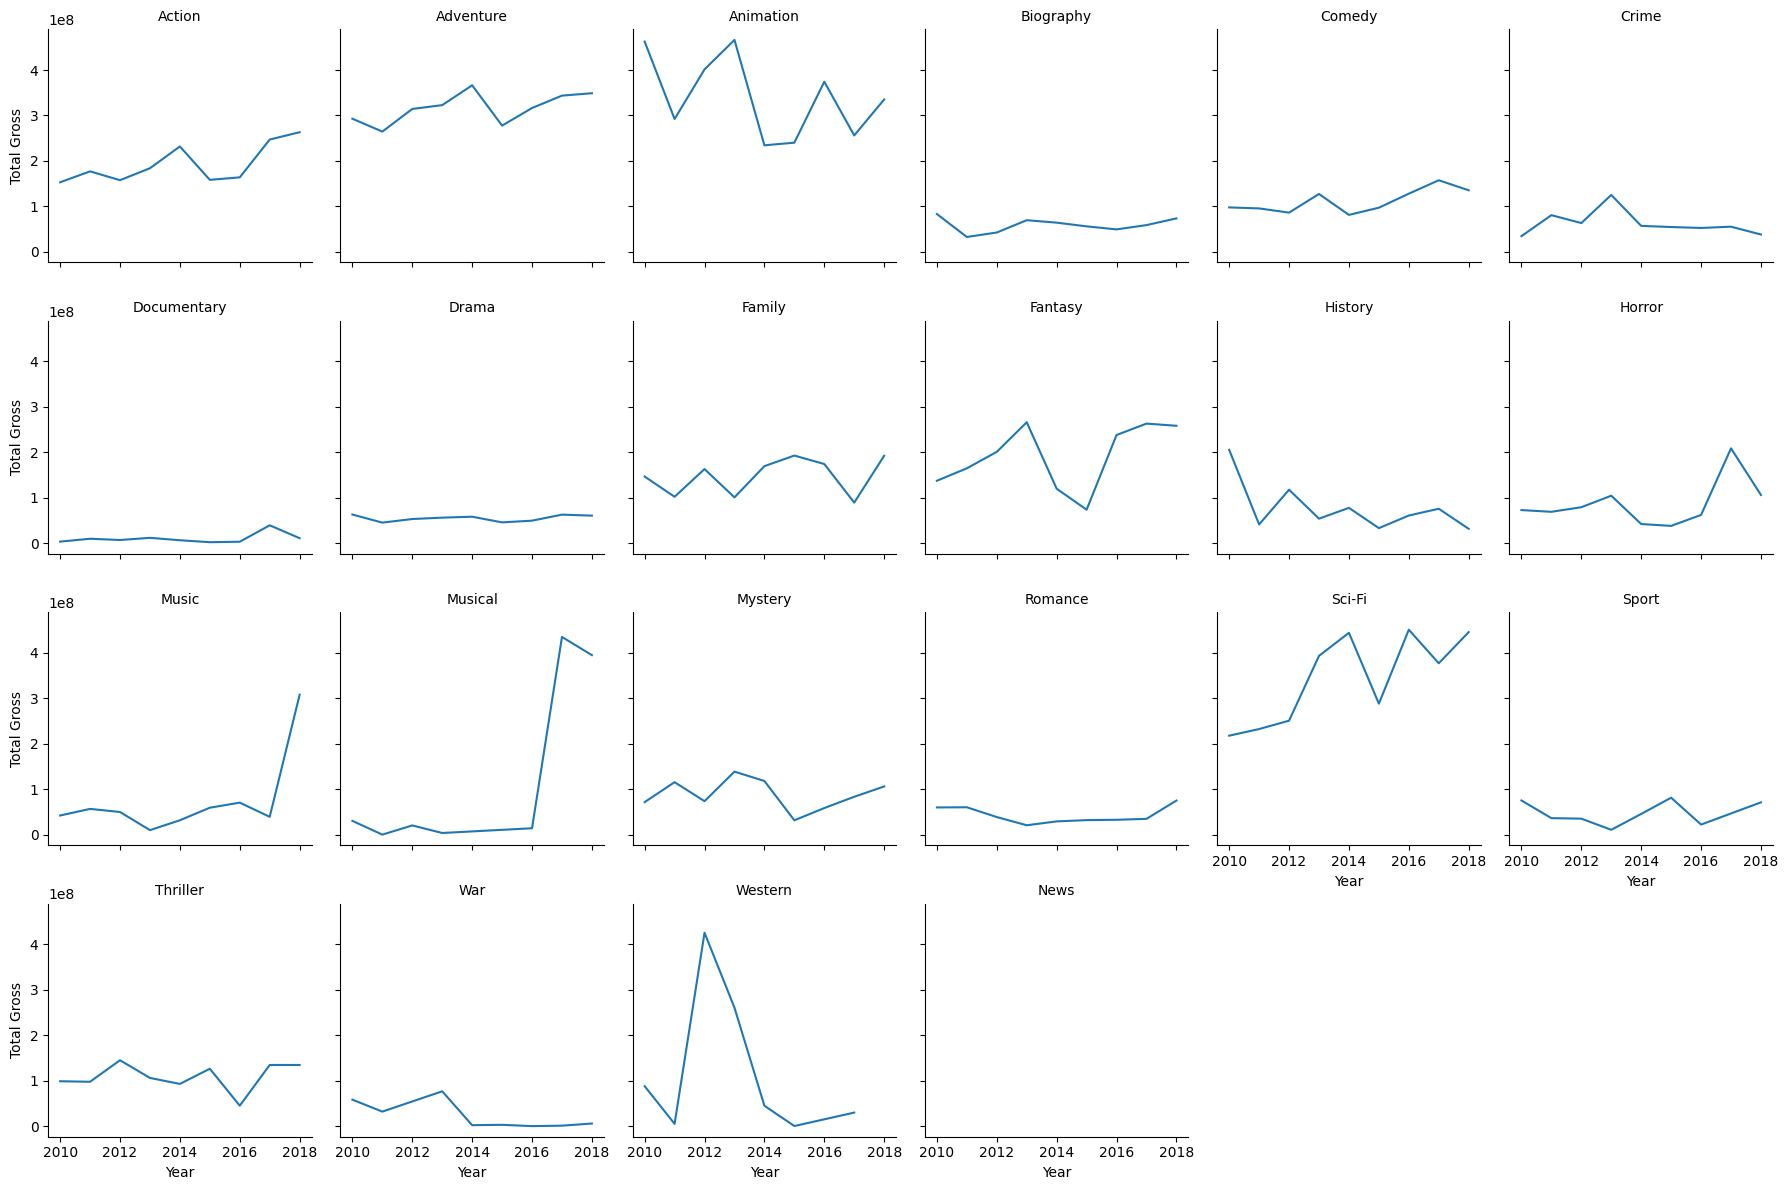

In [435]:
# Plotting the individual genre performances over the years
g = sns.FacetGrid(df_years_grouped.reset_index(), col='Specific_Genre', col_wrap=6)
g.map(sns.lineplot, 'year','total_gross')
g.set_axis_labels('Year', 'Total Gross')
g.set_titles(col_template='{col_name}')
plt.savefig('Trends Per Genre.jpg');

Genres worth venturig into as they seem to be having an upward trend in their gross figures over time are:
* Action
* Music
* Musical

Genres that have shown a somewhat consistent gross and can be considered a safe bet are:
* Biography
* Drama

However, the genres with steady returns have a low gross figure.

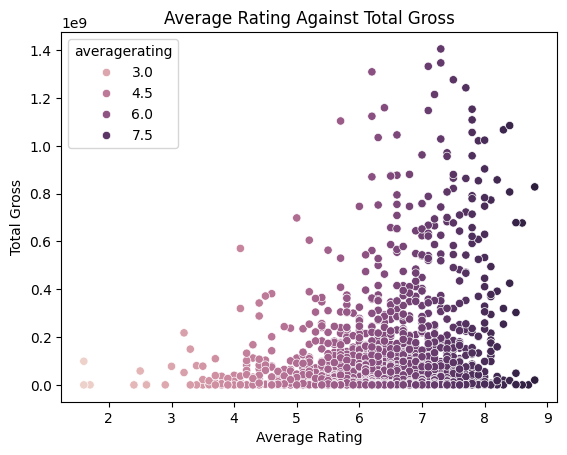

In [436]:
# Checking the relationship between rating and total gross
sns.scatterplot(data=df, x='averagerating', y='total_gross', hue='averagerating').set(xlabel='Average Rating', ylabel='Total Gross', title='Average Rating Against Total Gross')
plt.savefig('Average Rating Against Gross.jpg');

In [437]:
# Checking the covariance between average rating and total gross
np.corrcoef(df['averagerating'],df['total_gross'])[0,1]

np.float64(0.20211734532196732)

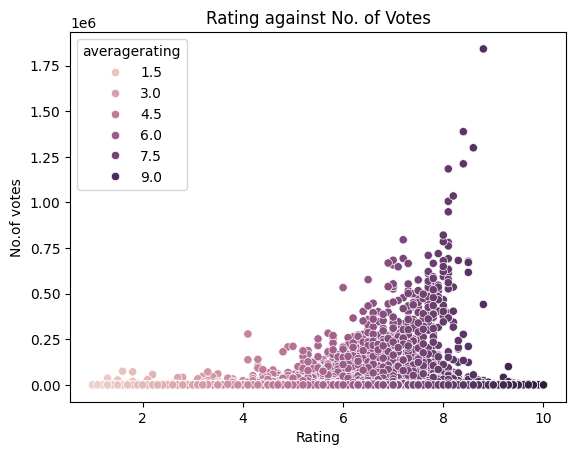

In [438]:
# Checking how number of votes relates to ratings
sns.scatterplot(x='averagerating', y='numvotes', data = ratings, hue='averagerating').set(xlabel='Rating', ylabel='No.of votes', title= 'Rating against No. of Votes')
plt.savefig('Average Rating Against No. of Votes.jpg');

In [439]:
# Checking the covariance between ratings and number of votes
np.corrcoef(ratings['averagerating'],ratings['numvotes'])[0,1]

np.float64(0.04447809440198376)

There is a weak but positive correlation between average rating and number of votes, indicating that generally, audiences tend to vote in slightly larger numbers when satisfied with a movie.
Highly rated movies also tend to gross more.

## **Conclusion**

1. The top 3 best performing genres by gross that should be considered by Microsoft are:
 * Animation
 * SciFi
 * Adventure

2. Genres that look promising based on trends over the years and could be worth giving a try are:
 * Action
 * Music
 * Musical

3. If Microsoft is considering consistent returns, it should consider venturing into biography and drama. However, the results in these genres are quite low compared to the top 3 performing genres.

4. Top 3 competitors:
 * HC
 * P/WD
 * BV

5. Movies that are highly rated and voted for in large numbers tend to also have a high gross.
